### Импорт библиотек и подключение к Google Drive

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

### Чтение данных

In [4]:
DATA_PATH = '/content/drive/MyDrive/Data/HeartDiseases/data.csv'

In [5]:
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Описание датасета

- age: Возраст человека в годах
- sex: Пол человека (1 - мужской, 0 - женский)
- cp: Испытываемая боль в груди (1 - типичная стенокардия, 2 - атипичная стенокардия, 3 - неангинозная боль, 4 - бессимптомное течение)
- trestbps: Артериальное давление человека в состоянии покоя (в мм рт. ст. при поступлении в больницу)
- chol: Измерение уровня холестерина в мг/дл.
- fbs: Уровень сахара в крови человека натощак (1 - больше 120 мг/дл, 0 - меньше либо равно 120 мг/дл)
- restecg: Электрокардиографическое измерение в состоянии покоя (0 - нормальное, 1 - наличие аномалии ST-T, 2 - выявлена вероятность или достоверность гипертрофии левого желудочка по критериям Эстеса)
- thalach: Максимальная достигнутая частота сердечных сокращений
- exang: Стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет)
- oldpeak: Депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя (ST относится к положениям на графике ЭКГ)
- slope: Наклон сегмента ST пикового упражнения (1 - восходящий, 2 - плоский, 3 - нисходящий)
- ca: Количество крупных сосудов (от 0 до 3)
- thal: Заболевание крови, называемое талассемией (3 - норма, 6 - постоянный дефект, 7 - обратимый дефект)
- target:  Болезнь сердца (0 - нет, 1 - да)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Преобразования датасета

In [9]:
df.rename(
    columns={
        'cp': 'chest_pain_type',
        'trestbps': 'resting_blood_pressure',
        'chol': 'cholestoral',
        'fbs': 'fasting_blood_sugar',
        'restecg': 'resting_electrocardiographic',
        'thalach': 'maximum_heart_rate',
        'exang': 'exercise_induced_angina',
        'oldpeak': 'ST_depression',
        'slope': 'slope_peak_exercise_ST',
        'ca':'number_of_major_vessels'
    },
    inplace=True
)

In [10]:
pd.Series(df.columns)

0                              age
1                              sex
2                  chest_pain_type
3           resting_blood_pressure
4                      cholestoral
5              fasting_blood_sugar
6     resting_electrocardiographic
7               maximum_heart_rate
8          exercise_induced_angina
9                    ST_depression
10          slope_peak_exercise_ST
11         number_of_major_vessels
12                            thal
13                          target
dtype: object

In [11]:
df['sex'] = df['sex'].map({
    0: 'female',
    1: 'male'
})
df['chest_pain_type'] = df['chest_pain_type'].map({
    0: 'typical_angina',
    1: 'atypical_angina',
    2: 'non_anginal',
    3: 'asymptomatic'
})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
    0: 'bigger_120_mg/dl',
    1: 'lower_120_mg/dl'
})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
    0: 'normal',
    1: 'ST_T_wave_abnormality',
    2: 'ventricular_hypertrophy'
})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
    0: 'no',
    1: 'yes'
})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})
df['thal'] = df['thal'].map({
    0: 'normal_0',
    1: 'normal_1',
    2: 'fixed_defect',
    3: 'reversable_defect'
})
df['target'] = df['target'].map({
    0: 'no_disease',
    1: 'disease'
})

In [19]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,52,male,typical_angina,125,212,bigger_120_mg/dl,ST_T_wave_abnormality,168,no,1.0,downsloping,2,reversable_defect,no_disease
1,53,male,typical_angina,140,203,lower_120_mg/dl,normal,155,yes,3.1,upsloping,0,reversable_defect,no_disease
2,70,male,typical_angina,145,174,bigger_120_mg/dl,ST_T_wave_abnormality,125,yes,2.6,upsloping,0,reversable_defect,no_disease
3,61,male,typical_angina,148,203,bigger_120_mg/dl,ST_T_wave_abnormality,161,no,0.0,downsloping,1,reversable_defect,no_disease
4,62,female,typical_angina,138,294,lower_120_mg/dl,ST_T_wave_abnormality,106,no,1.9,flat,3,fixed_defect,no_disease


In [13]:
initial_df = df

### Анализ датасета

In [14]:
categorical_cols = []
numeric_cols = []
for i in df.columns:
    is_categorical = len(df[i].unique()) <= 5
    if is_categorical:
        categorical_cols.append(i)
    else:
        numeric_cols.append(i)
    
    print(f'unique values: {len(df[i].unique()):<5}{i:<30}{is_categorical:<5}')

categorical_data = df[categorical_cols]
numeric_data = df[numeric_cols]

unique values: 41   age                           0    
unique values: 2    sex                           1    
unique values: 4    chest_pain_type               1    
unique values: 49   resting_blood_pressure        0    
unique values: 152  cholestoral                   0    
unique values: 2    fasting_blood_sugar           1    
unique values: 3    resting_electrocardiographic  1    
unique values: 91   maximum_heart_rate            0    
unique values: 2    exercise_induced_angina       1    
unique values: 40   ST_depression                 0    
unique values: 3    slope_peak_exercise_ST        1    
unique values: 5    number_of_major_vessels       1    
unique values: 4    thal                          1    
unique values: 2    target                        1    


In [15]:
categorical_len = len(categorical_cols)
numeric_len = len(numeric_cols)
max_len = max(numeric_len, categorical_len)

pd.DataFrame(
    data={
        'categorical attributes': [*categorical_cols, *['']*(max_len - categorical_len)],
        'numeric attributes': [*numeric_cols, *['']*(max_len - numeric_len)]
    },
    index=np.arange(max_len)
)

,categorical attributes,numeric attributes
0,sex,age
1,chest_pain_type,resting_blood_pressure
2,fasting_blood_sugar,cholestoral
3,resting_electrocardiographic,maximum_heart_rate
4,exercise_induced_angina,ST_depression
5,slope_peak_exercise_ST,
6,number_of_major_vessels,
7,thal,
8,target,


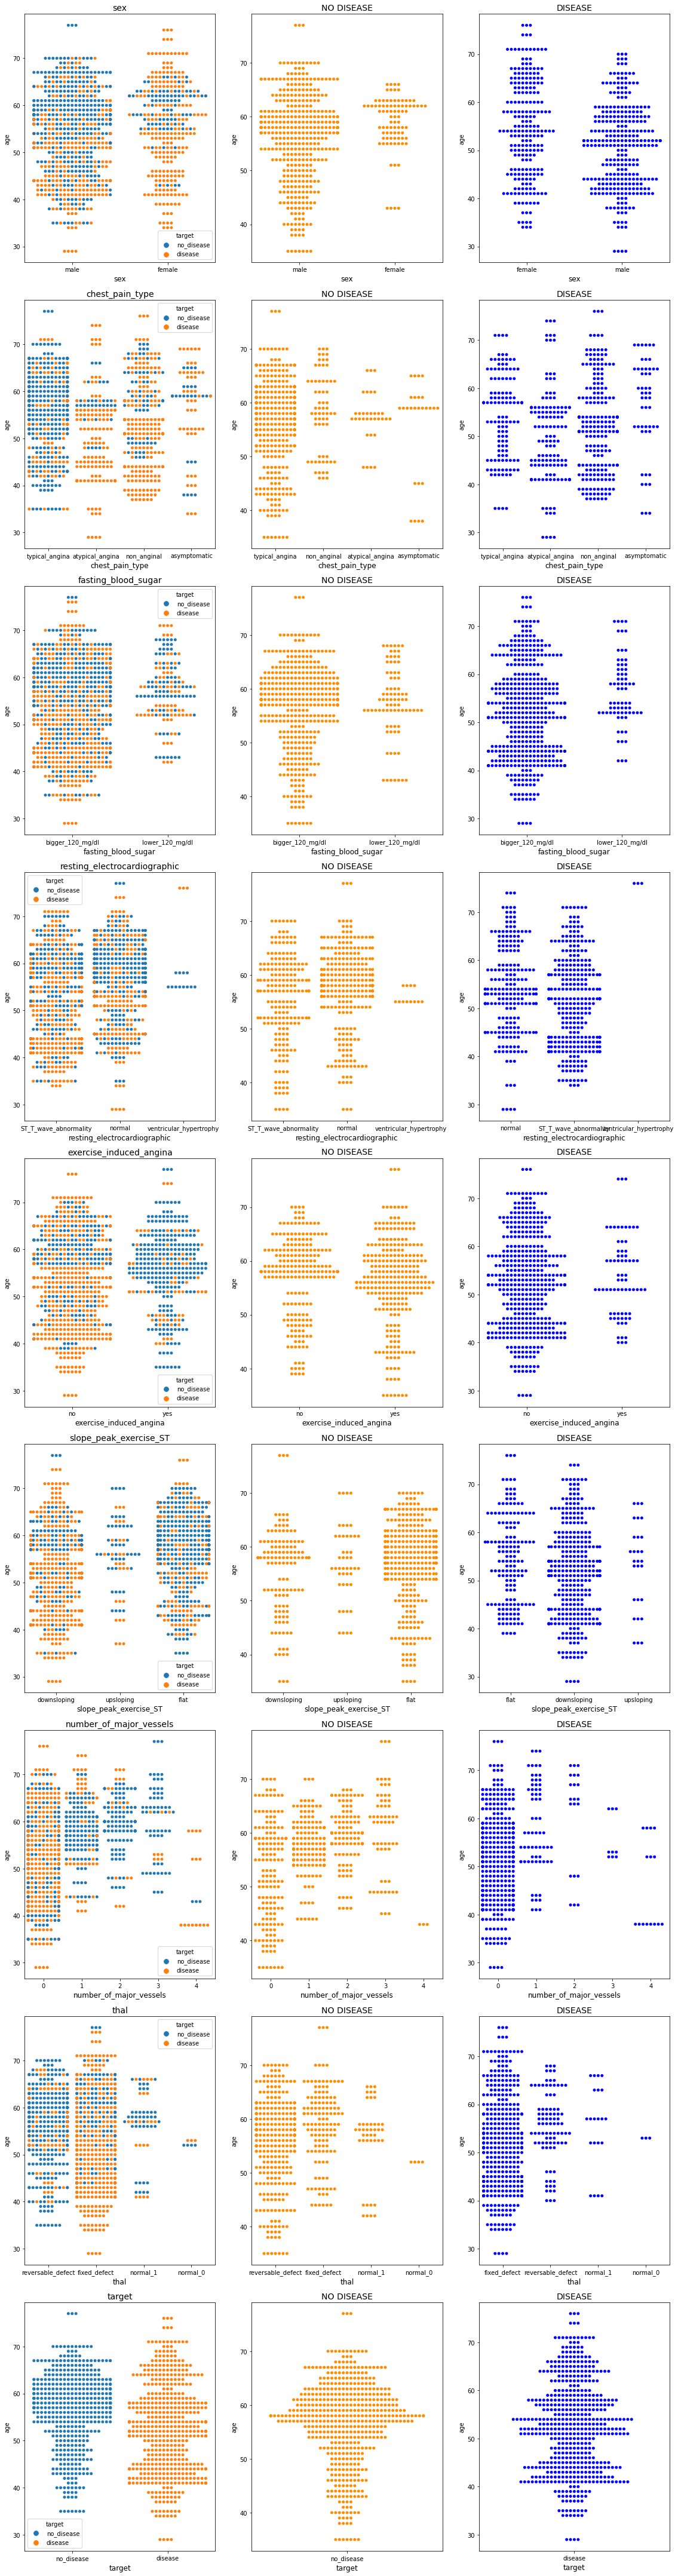

In [16]:
disease = df[df['target'] == 'disease']
no_disease = df[df['target'] == 'no_disease']

sub_num_of_rows = len(categorical_data.columns)
sub_num_of_cols = 3
sub_plot_i  = 1

fig = plt.figure(figsize=(16, 60))

for i in categorical_cols:
    # overall
    fig.add_subplot(sub_num_of_rows, sub_num_of_cols, sub_plot_i)
    plt.title(i, fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i], y=df.age, hue=df.target)
    sub_plot_i = sub_plot_i + 1

    # no_disease
    fig.add_subplot(sub_num_of_rows, sub_num_of_cols, sub_plot_i)
    plt.title('NO DISEASE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_disease, x=no_disease[i],y=no_disease.age, color='darkorange')
    sub_plot_i += 1

    # disease
    fig.add_subplot(sub_num_of_rows, sub_num_of_cols, sub_plot_i)
    plt.title('DISEASE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    
    sns.swarmplot(data=disease, x=disease[i], y=disease.age, color='blue')
    sub_plot_i += 1

plt.tight_layout()

**Наблюдения:**

- sex - данные показывают, что мужское население без болезней сердца больше, чем женское, однако популяция пациентов с сердечными заболеваниями почти одинакова, а женское население распределено по более длинному возрастному диапазону
- chest_pain_type - типичная стенокардия составляет большинство случаев без заболеваний сердца. Люди с чем-либо, кроме типичной стенокардии, имеют более высокий риск сердечно-сосудистых заболеваний
- fasting_blood_sugar - не является хорошим показателем сердечно-сосудистых заболеваний, поскольку распределение здорового и нездорового населения практически одинаково
- resting_electrocardiographic - не является хорошим показателем сердечно-сосудистых заболеваний, поскольку распределение здорового и нездорового населения практически одинаково
- exercise_induced_angina - не является хорошим показателем сердечно-сосудистых заболеваний, поскольку распределение здорового и нездорового населения практически одинаково
- slope_peak_exercise_ST — население с наклоном вниз и с пологим уклоном имеет более высокую частоту сердечных заболеваний
- number_of_major_vessels — пациенты, у которых сосуды не окрашены при рентгеноскопии, имеют гораздо более высокую частоту сердечных заболеваний
- thal - у больных с фиксированным пороком значительно выше частота пороков сердца

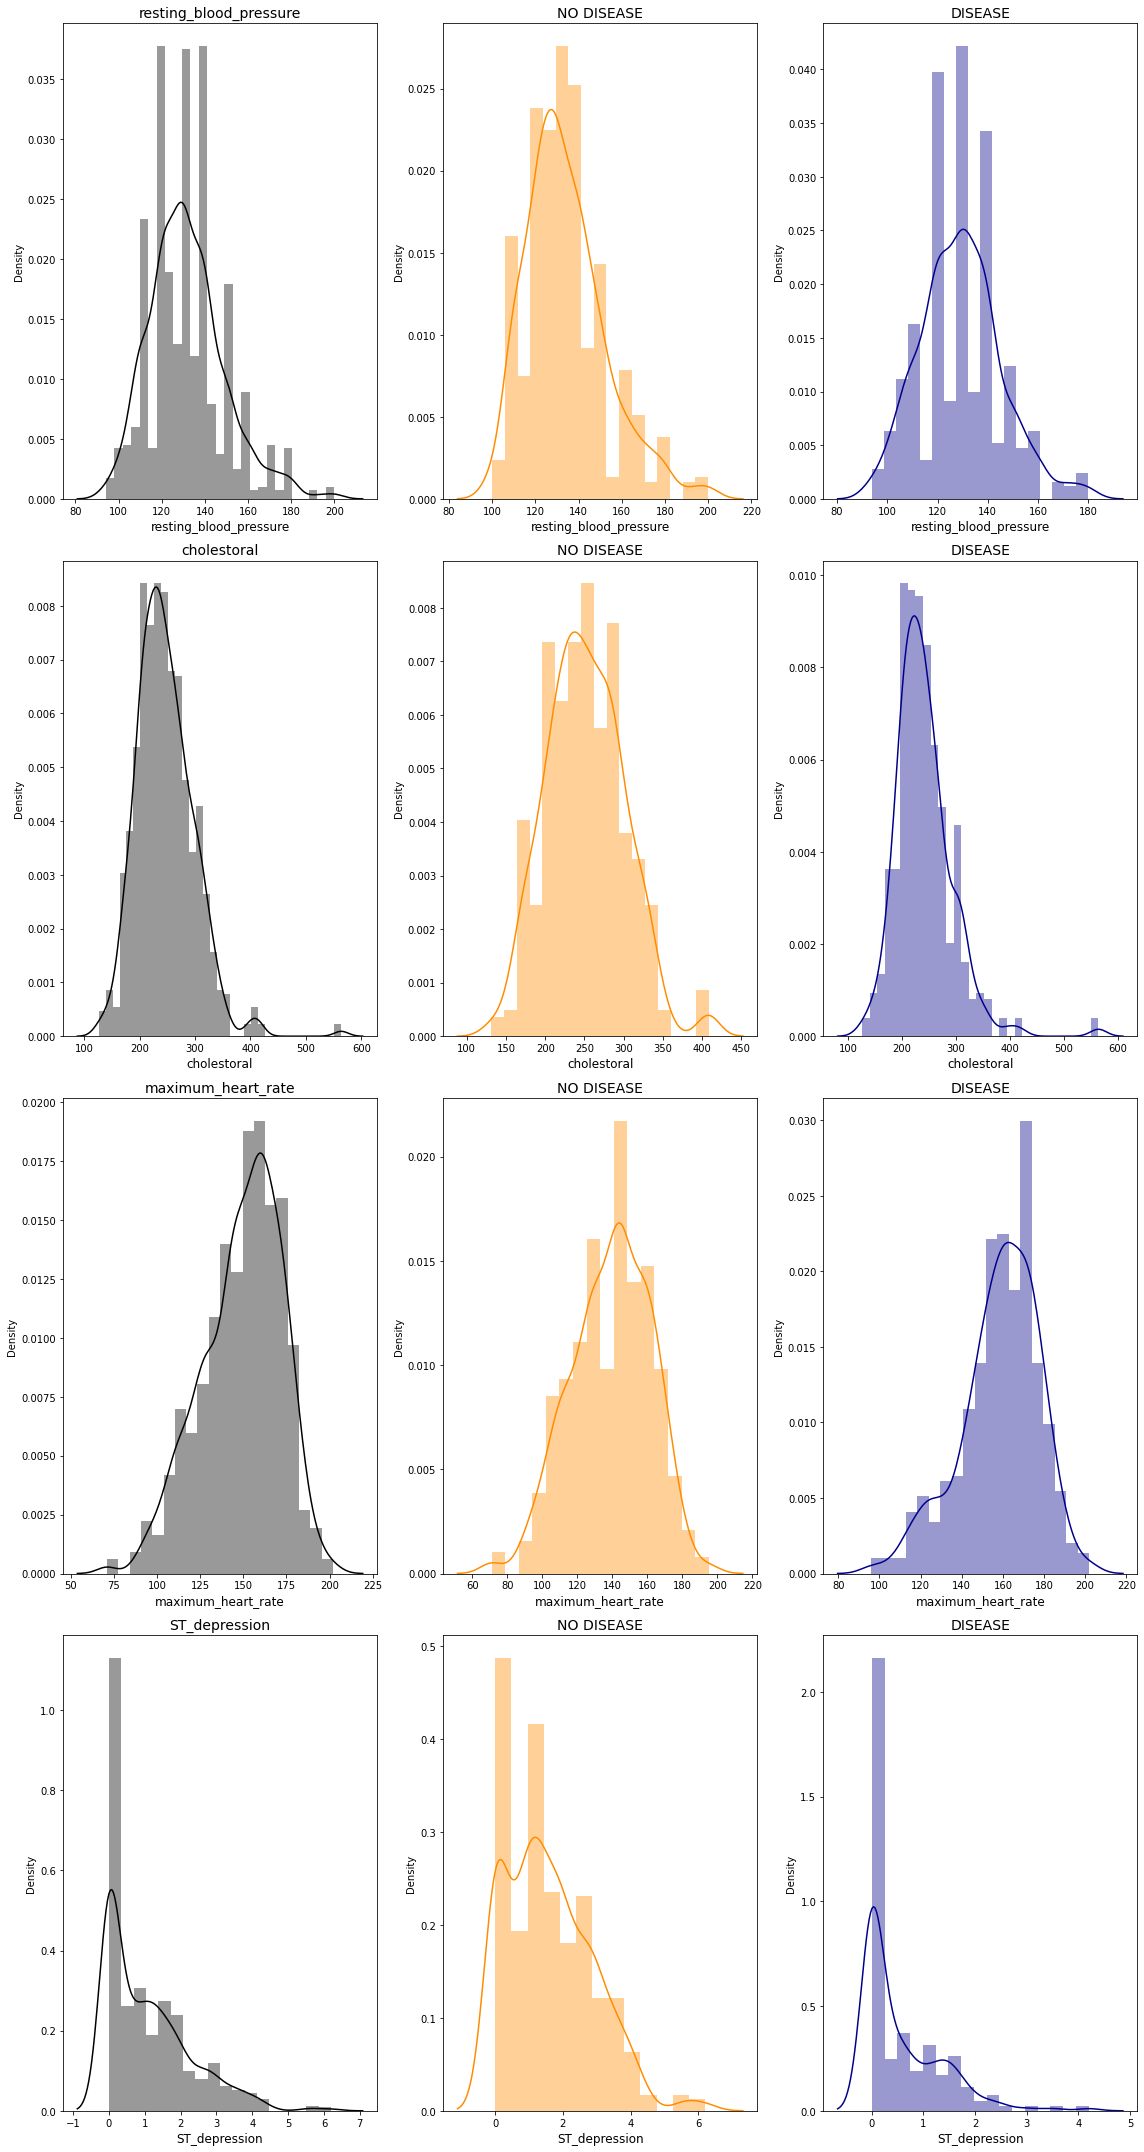

In [18]:
disease_numeric = df[df['target'] == 'disease']
no_disease_numeric = df[df['target'] == 'no_disease']

sub_num_of_row = len(numeric_data.columns) - 1
sub_num_of_col = 3
sub_plot_num  = 1

fig = plt.figure(figsize=(16, 30))

for i in numeric_data.copy().columns.drop(['age']):
    # overall
    fig.add_subplot(sub_num_of_row, sub_num_of_col, sub_plot_num)
    plt.title(i, fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i], color='black')
    sub_plot_num += 1

    # no_disease_numeric
    fig.add_subplot(sub_num_of_row, sub_num_of_col, sub_plot_num)
    plt.title('NO DISEASE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_disease_numeric[i],color='darkorange')
    sub_plot_num += 1

    # disease_numeric
    fig.add_subplot(sub_num_of_row, sub_num_of_col, sub_plot_num)
    plt.title('DISEASE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(disease_numeric[i],color='darkblue')
    sub_plot_num += 1

plt.tight_layout()

**Наблюдения:**

На графиках между артериальным давлением, холестерином, максимальной частотой сердечных сокращений, депрессией сегмента ST и болезнью сердца в зависимости от возраста и пола нет заметных закономерностей

Корреляция даст лучшее понимание отношений между атрибутами и сердечными заболеваниями

### Логистическая регрессия

Алгоритмы машинного обучения не могут обрабатывать категориальные или текстовые данные, если они не были преобразованы в числа

**One hot encoding** сопоставляет категориальные значения с целочисленными значениями, которые представлены в виде двоичного вектора, все из которых являются нулевыми значениями, за исключением индекса целого числа, который установлен на 1

In [16]:
for i in categorical_cols:
    df[i] = df[i].astype(object)
    
df_ohe = df[categorical_cols]
df_ohe = pd.get_dummies(df_ohe)
df_ohe = df_ohe.join(df[numeric_cols])

df_ohe = df_ohe.join(df['target'])
df_ohe['target'] = df_ohe['target'].map({'no_disease': 0, 'disease': 1})
df_ohe = df_ohe.drop(['target_disease', 'target_no_disease'], axis=1)

In [17]:
df_ohe.head(10)

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal,chest_pain_type_typical_angina,fasting_blood_sugar_bigger_120_mg/dl,fasting_blood_sugar_lower_120_mg/dl,resting_electrocardiographic_ST_T_wave_abnormality,resting_electrocardiographic_normal,...,thal_fixed_defect,thal_normal_0,thal_normal_1,thal_reversable_defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,52,125,212,168,1.0,0
1,0,1,0,0,0,1,0,1,0,1,...,0,0,0,1,53,140,203,155,3.1,0
2,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,70,145,174,125,2.6,0
3,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,61,148,203,161,0.0,0
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,62,138,294,106,1.9,0
5,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,58,100,248,122,1.0,1
6,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,58,114,318,140,4.4,0
7,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,55,160,289,145,0.8,0
8,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,46,120,249,144,0.8,0
9,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,54,122,286,116,3.2,0


In [18]:
pd.Series(df_ohe.columns)

0                                            sex_female
1                                              sex_male
2                          chest_pain_type_asymptomatic
3                       chest_pain_type_atypical_angina
4                           chest_pain_type_non_anginal
5                        chest_pain_type_typical_angina
6                  fasting_blood_sugar_bigger_120_mg/dl
7                   fasting_blood_sugar_lower_120_mg/dl
8     resting_electrocardiographic_ST_T_wave_abnorma...
9                   resting_electrocardiographic_normal
10    resting_electrocardiographic_ventricular_hyper...
11                           exercise_induced_angina_no
12                          exercise_induced_angina_yes
13                   slope_peak_exercise_ST_downsloping
14                          slope_peak_exercise_ST_flat
15                     slope_peak_exercise_ST_upsloping
16                            number_of_major_vessels_0
17                            number_of_major_ve

Нормализация — это масштабирование данных из исходного набора таким образом, чтобы все значения находились в определенном диапазоне, обычно от 0 до 1. Нормализованные данные необходимы для машинного обучения. Корреляция и модели обычно не дают хороших результатов, если данные не стандартизирован

Использование MixMaxScalar для сохранения зачений столбца **sex** как *0* и *1*. **StandardScaler** преобразует столбцы значения поля **sex** в *-0,68* и *1,46* для женщин, *-1,46* и *0,68* для мужчин

In [19]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit_transform(df_ohe)
norm

array([[0.        , 1.        , 0.        , ..., 0.74045802, 0.16129032,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.64122137, 0.5       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.41221374, 0.41935484,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.35877863, 0.16129032,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.67175573, 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.32061069, 0.22580645,
        0.        ]])

In [20]:
df = pd.DataFrame(norm, index=df_ohe.index, columns=df_ohe.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal,chest_pain_type_typical_angina,fasting_blood_sugar_bigger_120_mg/dl,fasting_blood_sugar_lower_120_mg/dl,resting_electrocardiographic_ST_T_wave_abnormality,resting_electrocardiographic_normal,...,thal_fixed_defect,thal_normal_0,thal_normal_1,thal_reversable_defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.479167,0.292453,0.196347,0.740458,0.161290,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.500000,0.433962,0.175799,0.641221,0.500000,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.854167,0.481132,0.109589,0.412214,0.419355,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.666667,0.509434,0.175799,0.687023,0.000000,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.687500,0.415094,0.383562,0.267176,0.306452,0.0


In [22]:
from sklearn.model_selection import train_test_split

X_global = df.drop(['target'], axis=1)
y_global = df['target']

X_train, X_test, y_train, y_test = train_test_split(X_global, y_global, test_size=0.2, random_state=4)

len(X_train), len(X_test)

(820, 205)

In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [24]:
y_predict = LR.predict(X_test)
y_predict[0:10]

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 1.])

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy')
mean_score = scores.mean()

print(f'Scores: {scores}')
print(f'Mean cross-validation score: {mean_score:.2%}')

Scores: [0.8597561  0.84756098 0.82926829 0.83536585 0.8597561 ]
Mean cross-validation score: 84.63%


In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy:  {accuracy:.2%}')

Accuracy:  81.95%


In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_predict)
print(f'F1:  {f1:.2%}')

F1:  81.95%


### Собственная модель

In [28]:
%%capture
!pip install wandb
!pip install torchmetrics

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

from torchmetrics import MeanMetric
import torchmetrics.functional as metrics

import wandb
import os
from pathlib import Path
from tqdm.notebook import tqdm

In [30]:
%env WANDB_SILENT=True
wandb.login()

env: WANDB_SILENT=True


<IPython.core.display.Javascript object>

True

In [31]:
PROJECT_NAME = 'HeartDiseases'
CHECKPOINTS_FOLDER = Path(f'/content/drive/MyDrive/Checkpoints/{PROJECT_NAME}/')
CHECKPOINTS_FOLDER.mkdir(exist_ok=True)

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

#### Создание датасетов для тренировки, валидации и теста

In [33]:
class HeartDiseasesDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.astype(np.float32)
        self.y = y.astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def slice(self, indices):
        return HeartDiseasesDataset(self.X[indices], self.y[indices])

In [34]:
dataset = HeartDiseasesDataset(X_global.to_numpy(), y_global.to_numpy())
loader = DataLoader(dataset, batch_size=10)

first_batch_X, first_batch_y = next(iter(loader))

n_samples = len(dataset)
n_features = first_batch_X[0].shape[0]

print(n_samples, n_features, '\n')
print(first_batch_X[0], '\n')
print(first_batch_y[0])

1025 30 

tensor([0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4792, 0.2925,
        0.1963, 0.7405, 0.1613]) 

tensor(0.)


In [76]:
data_size = len(dataset)
test_split_i = int(data_size * 0.20)
val_split_i = int(data_size * 0.32)
data_indices = list(range(data_size))

test_indices = data_indices[:test_split_i]
val_indices = data_indices[test_split_i:val_split_i]
train_indices = data_indices[val_split_i:]

len(train_indices), len(val_indices), len(test_indices)

(697, 123, 205)

In [77]:
def get_loaders(batch_size):
    train_loader = DataLoader(
        dataset=dataset, 
        batch_size=batch_size,
        sampler=SubsetRandomSampler(train_indices)
    )
    val_loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        sampler=SubsetRandomSampler(val_indices)
    )
    test_loader = DataLoader(
        dataset=dataset.slice(test_indices),
        batch_size=len(test_indices)
    )
    return train_loader, val_loader, test_loader

#### Тренировка

In [78]:
def train_model(
    train_loader,
    val_loader,
    model,
    criterion,
    metric,
    optimizer,
    scheduler=None,
    epochs=5,
    run_name='main',
    log=False,
    silent_mode=False,
    print_step=1,
    metric_treshhold=0.0
):
    if log:
        wandb.init(project=PROJECT_NAME)

    loss_meter, metric_meter = MeanMetric(), MeanMetric()
    best_loss, best_metric = float('inf'), 0

    for epoch in tqdm(range(1, epochs + 1), disable=silent_mode):
        # Train
        loss_meter.reset()
        metric_meter.reset()
        model.train()
        for X, y in train_loader:
            X_gpu = X.to(device)
            y_gpu = y.to(device)
            prediction = model(X_gpu)
            loss_value = criterion(prediction, y_gpu.unsqueeze(1))
            metric_value = metric(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            loss_meter.update(loss_value.item())
            metric_meter.update(metric_value.item())
        
        train_loss, train_metric = loss_meter.compute(), metric_meter.compute()
        
        # Validation
        loss_meter.reset()
        metric_meter.reset()
        model.eval()
        with torch.no_grad():
            for X, y in val_loader:
                X_gpu = X.to(device)
                y_gpu = y.to(device)
                prediction = model(X_gpu)
                loss_value = criterion(prediction, y_gpu.unsqueeze(1))
                metric_value = metric(prediction, y_gpu)
                loss_meter.update(loss_value.item())
                metric_meter.update(metric_value.item())
        
        val_loss, val_metric = loss_meter.compute(), metric_meter.compute()

        # Learning rate annealing
        if scheduler is not None:
            if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(train_loss)
            else:
                scheduler.step()

        # Log
        if not silent_mode and epoch % print_step == 0:
            print(f'epoch: {epoch:<3}', end=' | ') 
            print(f'train_loss: {train_loss:.5f}', end=' | ')
            print(f'train_metric: {train_metric:.3f}', end=' | ')
            print(f'val_loss: {val_loss:.5f}', end=' | ')
            print(f'val_metric: {val_metric:.3f}')
        if log:
            wandb.log({
                'train_loss': train_loss,
                'train_metric': train_metric,
                'val_loss': val_loss,
                'val_metric': val_metric
            }, step=epoch)

        # Saving model checkpoint
        if val_loss < best_loss:
            best_loss = val_loss
            best_metric = val_metric
            torch.save(model, os.path.join(CHECKPOINTS_FOLDER, f'{run_name}.pt'))
        
        # Exiting if metric is low
        if val_metric < metric_treshhold:
            break
    
    if log:
        wandb.finish()

    if not silent_mode:
        print(f'\nbest_loss: {best_loss:.5f}, best_metric: {best_metric:.3f}')
    else:
        return best_loss.item(), best_metric.item()

In [63]:
def get_best_model(checkpoints_folder, run_name):
    return torch.load(os.path.join(checkpoints_folder, f'{run_name}.pt'))

#### Метрики


In [79]:
class Accuracy(nn.Module):
    def __init__(self, threshold=0.5, smooth=1e-15):
        super().__init__()
        self.threshold = threshold
        self.smooth = smooth
    
    def forward(self, preds, outputs):
        preds_flatten = torch.round(preds.flatten().detach())
        outputs_flatten = outputs.flatten()
        return (preds_flatten == outputs_flatten).sum() / len(preds_flatten)

#### Модель, функция потерь, оптимизатор

In [80]:
class HeartDiseasesNet(nn.Module):
    def __init__(self, n_features, n_layer_1, n_layer_2):
        super().__init__()
        self.fc1 = nn.Linear(n_features, n_layer_1)
        self.batch_norm1 = nn.BatchNorm1d(n_layer_1)
        self.fc2 = nn.Linear(n_layer_1, n_layer_2)
        self.batch_norm2 = nn.BatchNorm1d(n_layer_2)
        self.fc3 = nn.Linear(n_layer_2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.batch_norm1(self.fc1(x)))
        x = self.relu(self.batch_norm2(self.fc2(x)))
        x = self.sigmoid(self.fc3(x))
        return x

In [81]:
train_loader, val_loader, _ = get_loaders(batch_size=75)

n_layer_1 = 16
n_layer_2 = 9

model = HeartDiseasesNet(n_features, n_layer_1, n_layer_2)
model.to(device)

criterion = nn.BCELoss()
metric = Accuracy()
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=1e-3, weight_decay=1e-3)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[100, 150], gamma=0.1)

In [82]:
train_model(
    train_loader,
    val_loader,
    model,
    criterion,
    metric,
    optimizer,
    scheduler,
    epochs=300,
    run_name='Try-3',
    log=True,
    print_step=20
)

  0%|          | 0/300 [00:00<?, ?it/s]

epoch: 20  | train_loss: 0.50056 | train_metric: 0.819 | val_loss: 0.44214 | val_metric: 0.832
epoch: 40  | train_loss: 0.38093 | train_metric: 0.871 | val_loss: 0.31760 | val_metric: 0.904
epoch: 60  | train_loss: 0.31333 | train_metric: 0.898 | val_loss: 0.25033 | val_metric: 0.933
epoch: 80  | train_loss: 0.26369 | train_metric: 0.919 | val_loss: 0.20943 | val_metric: 0.929
epoch: 100 | train_loss: 0.23393 | train_metric: 0.919 | val_loss: 0.18730 | val_metric: 0.939
epoch: 120 | train_loss: 0.22329 | train_metric: 0.934 | val_loss: 0.18949 | val_metric: 0.932
epoch: 140 | train_loss: 0.22565 | train_metric: 0.922 | val_loss: 0.17789 | val_metric: 0.935
epoch: 160 | train_loss: 0.22471 | train_metric: 0.920 | val_loss: 0.17831 | val_metric: 0.939
epoch: 180 | train_loss: 0.22483 | train_metric: 0.919 | val_loss: 0.17283 | val_metric: 0.943
epoch: 200 | train_loss: 0.22806 | train_metric: 0.925 | val_loss: 0.18223 | val_metric: 0.935
epoch: 220 | train_loss: 0.23078 | train_metric: 0

#### Предсказание

In [83]:
def evaluate_model(loader, model):

    X, y = next(iter(loader))

    model.eval()
    with torch.no_grad():
        X_gpu = X.to(device)
        preds = model(X_gpu)
    
    return X, y, preds.cpu()

In [84]:
_, _, test_loader = get_loaders(batch_size=50)
best_model = get_best_model(CHECKPOINTS_FOLDER, 'Try-3')

In [85]:
inputs, outputs, preds = evaluate_model(test_loader, best_model)

In [86]:
accuracy = Accuracy()(preds, outputs).item()
print(f'Test accuracy: {accuracy:.2%}')

Test accuracy: 94.15%


#### Визуализация результатов


In [46]:
%%capture
!pip install hiddenlayer
!pip install torchviz

In [87]:
import hiddenlayer as hl
from torchviz import make_dot

In [88]:
inputs_batch_tmp = next(iter(test_loader))[0]
preds_batch_tmp = best_model(inputs_batch_tmp)

In [89]:
transforms = [hl.transforms.Prune('Constant')]
graph = hl.build_graph(best_model, inputs_batch_tmp, transforms=transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('heart_disease_net_model', format='png')

In [90]:
graph = make_dot(
    preds_batch_tmp,
    params=dict(list(model.named_parameters()))
)
graph.render('heart_disease_net_model_2', format='png')

'heart_disease_net_model_2.png'

In [91]:
test_df = initial_df.iloc[test_indices].reset_index()
res_df = test_df.join(pd.Series(name='prediction', data=[f'{x[0]:.2%}' for x in preds.tolist()]))
res_df

,index,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target,prediction
0,0,52,male,typical_angina,125,212,bigger_120_mg/dl,ST_T_wave_abnormality,168,no,1.0,downsloping,2,reversable_defect,no_disease,18.32%
1,1,53,male,typical_angina,140,203,lower_120_mg/dl,normal,155,yes,3.1,upsloping,0,reversable_defect,no_disease,5.49%
2,2,70,male,typical_angina,145,174,bigger_120_mg/dl,ST_T_wave_abnormality,125,yes,2.6,upsloping,0,reversable_defect,no_disease,12.44%
3,3,61,male,typical_angina,148,203,bigger_120_mg/dl,ST_T_wave_abnormality,161,no,0.0,downsloping,1,reversable_defect,no_disease,9.34%
4,4,62,female,typical_angina,138,294,lower_120_mg/dl,ST_T_wave_abnormality,106,no,1.9,flat,3,fixed_defect,no_disease,23.64%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,62,female,typical_angina,124,209,bigger_120_mg/dl,ST_T_wave_abnormality,163,no,0.0,downsloping,0,fixed_defect,disease,95.61%
201,201,34,male,asymptomatic,118,182,bigger_120_mg/dl,normal,174,no,0.0,downsloping,0,fixed_defect,disease,83.42%
202,202,52,male,asymptomatic,152,298,lower_120_mg/dl,ST_T_wave_abnormality,178,no,1.2,flat,0,reversable_defect,disease,42.99%
203,203,64,male,asymptomatic,170,227,bigger_120_mg/dl,normal,155,no,0.6,flat,0,reversable_defect,disease,52.87%


In [92]:
wrong_df = res_df[
    np.array(list(map(lambda x: round(float(x[:-1]) / 100), res_df['prediction'])))
    !=
    np.array(list(map(int, res_df['target'] == 'disease')))
]
wrong_df

,index,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target,prediction
20,20,60,male,non_anginal,140,185,bigger_120_mg/dl,normal,155,no,3.0,flat,0,fixed_defect,no_disease,56.29%
35,35,46,male,non_anginal,150,231,bigger_120_mg/dl,ST_T_wave_abnormality,147,no,3.6,flat,0,fixed_defect,no_disease,65.60%
38,38,64,male,typical_angina,128,263,bigger_120_mg/dl,ST_T_wave_abnormality,105,yes,0.2,flat,1,reversable_defect,disease,6.79%
42,42,61,female,typical_angina,130,330,bigger_120_mg/dl,normal,169,no,0.0,downsloping,0,fixed_defect,no_disease,77.61%
65,65,59,male,asymptomatic,170,288,bigger_120_mg/dl,normal,159,no,0.2,flat,0,reversable_defect,no_disease,54.05%
82,82,46,male,non_anginal,150,231,bigger_120_mg/dl,ST_T_wave_abnormality,147,no,3.6,flat,0,fixed_defect,no_disease,65.60%
96,96,57,female,typical_angina,128,303,bigger_120_mg/dl,normal,159,no,0.0,downsloping,1,fixed_defect,disease,49.34%
111,111,53,male,typical_angina,142,226,bigger_120_mg/dl,normal,111,yes,0.0,downsloping,0,reversable_defect,disease,26.94%
148,148,52,male,asymptomatic,152,298,lower_120_mg/dl,ST_T_wave_abnormality,178,no,1.2,flat,0,reversable_defect,disease,42.99%
181,181,64,male,asymptomatic,110,211,bigger_120_mg/dl,normal,144,yes,1.8,flat,0,fixed_defect,disease,46.41%


In [93]:
res_df.to_excel('heart_diseases_res.xlsx')